In [1]:
import pandas as pd
import numpy as np
#file path to credit card csv file
file_path = os.path.join(os.path.expanduser("~"), "Desktop", "archive(2)", "creditcard.csv")
df = pd.read_csv(file_path) #read csv file as pandas object
CC_data = df.to_numpy() #CC_data will contain the Credit Card Fraud detection dataset as a numpy object
NaN_instances = []
#checking for NaN values in the dataset
for instance in CC_data:
    for datapoint in instance:
        if np.isnan(datapoint):
            NaN_instances.append(datapoint)
print(NaN_instances) #No NaN values so no need to clean up data

[]


# Mahalanobis Distance
We will be using Mahalanobis distance to detect anomalies in our Credit Card Fraud Detection Dataset. To do this, we will be following these steps: 
<strong>mahalanobisDistance:</strong>
- Function that caluclates Mahalanobis Distance. 
- Mahalanobis distance is the distance between a point and a cluster of points. Euclidean distance is the distance between two points. Mahalanobis distance is the multivariate version of the z-score formula
- Equation

D^2 = (x - m)^T * C^-1 * (x - m)

D^2 is the square of the Mahalanobis distance.

x is the vector of the observation (row in dataset)

m is the vector of mean values of independent variables

C^-1 is the inverse covariance matrix of independent variables(Correlation varies between -1 and 1: -1 is a negative relationship and 1 is a positive relationship and 0 is no relationship) 




In [2]:
feature_CC= CC_data[0:20000]
fraud_instances = []
for i in range(len(feature_CC)):
    if feature_CC[i][-1] == 1:
        fraud_instances.append(i)
feature_CC = np.array([arr[:-1] for arr in feature_CC])  

In [30]:
import numpy as np
from scipy import linalg

"""
Compute the Mahalanobis Distance between each row of x and the data
points: matrix of data that contains the points for which you want the Mahalanobis distance
distribution: ndarray of the distribution from which Mahalanobis distance of each observation of a point in points is to be computed.
"""
def mahalanobisDistance(points, distribution):
    colMeans = []
    for col in distribution.T:
        colMeans.append(np.mean(col))
    points_minus_mean = np.copy(points)
    for i in range(len(points)):
        for j in range(len(points[i])):
            points_minus_mean[i][j] = points[i][j] - colMeans[j]
    covarianceMatrix = np.cov(distribution.T)
    inverseCovarianceMatrix = linalg.inv(covarianceMatrix)
    mahalanobisDistanceMatrix = np.dot(np.dot(points_minus_mean, inverseCovarianceMatrix), points_minus_mean.T)
    return mahalanobisDistanceMatrix.diagonal()

    

In [33]:
res = mahalanobisDistance(feature_CC[fraud_instances], feature_CC)
print(np.mean(res))
print(np.median(res))
print(np.std(res))

res2 = mahalanobisDistance(feature_CC, feature_CC)
print(np.mean(res2))
print(np.median(res2))
print(np.std(res2))

344.58992391546985
290.3564356594156
282.63594145094726
29.998500000000053
18.00072412077605
93.1832474633936


In [35]:
numRight = 0 
mahalDistances = mahalanobisDistance(feature_CC, feature_CC)
for index, mahal in enumerate(mahalDistances):
    if mahal > 200 and index in fraud_instances:
        numRight += 1
print(numRight)
print(numRight/len(fraud_instances))

59
0.6941176470588235


In [38]:
maximum = 0
for i in range(150, 500):
    numRight = 0 
    mahalDistances = mahalanobisDistance(feature_CC, feature_CC)
    for index, mahal in enumerate(mahalDistances):
        if mahal > i and index in fraud_instances:
            numRight += 1
    if numRight/len(fraud_instances) > maximum:
        maximum = numRight/len(fraud_instances)
print(maximum)

0.7647058823529411


In [46]:
from sklearn.metrics import confusion_matrix

# Getting Labels
mahalDistances = mahalanobisDistance(feature_CC, feature_CC)
y_pred = []
for mahal in mahalDistances:
    if mahal > 200:
        y_pred.append(1)
    else:
        y_pred.append(0)

y_true = np.array(df["Class"][0:20000])

print(confusion_matrix(y_true, y_pred))
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
print("True Negative: ", tn)
print("False Positive: ", fp)
print("False Negative: ", fn)
print("True Positive: ", tp)
print("Precision: ", tp/(tp+fp))
print("Recall: ", tp/(tp+fn))

[[19706   209]
 [   26    59]]
True Negative:  19706
False Positive:  209
False Negative:  26
True Positive:  59
Precision:  0.22014925373134328
Recall:  0.6941176470588235


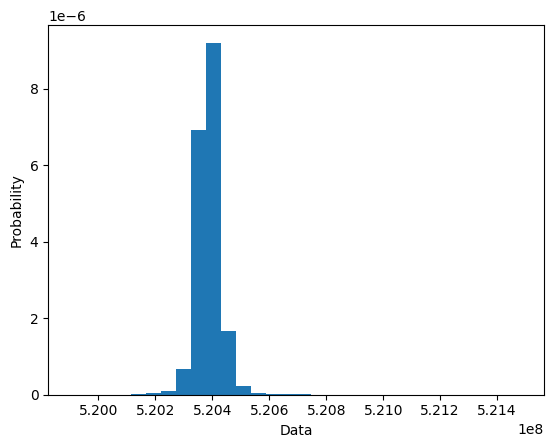

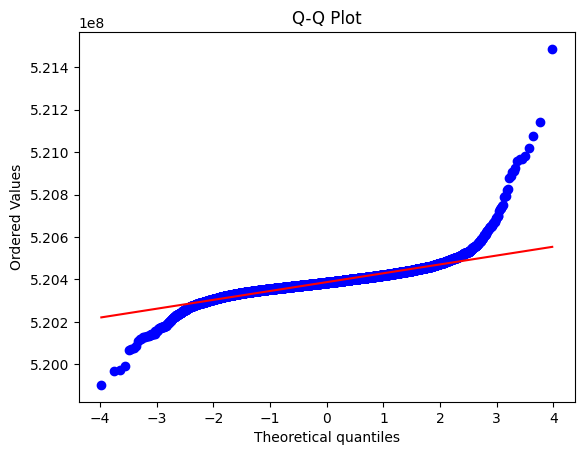

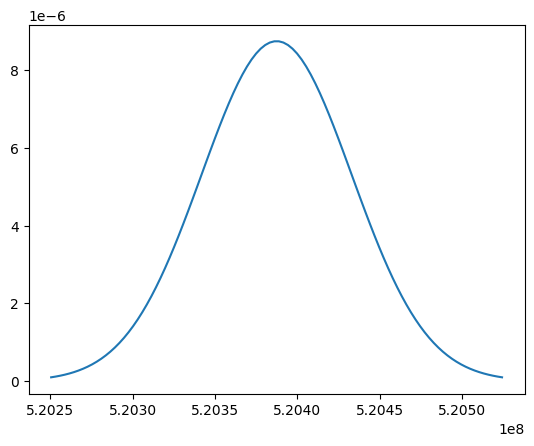

In [14]:
import matplotlib.pyplot as plt
import scipy.stats as stats
import math
import statistics

feature_CC = CC_data[np.random.choice(CC_data.shape[0], 20000, replace=True)]
feature_CC = np.array([arr[:-1] for arr in feature_CC])
res = []
for i in range(len(feature_CC)):
    res.append(mahalanobisDistance(feature_CC[i], feature_CC))
sigma = statistics.stdev(res)
mu = statistics.mean(res)


res = np.array(res)
plt.hist(res, density=True, bins=30)  # density=False would make counts
plt.ylabel('Probability')
plt.xlabel('Data')
plt.show()


stats.probplot(res, dist="norm", plot=plt)
plt.title('Q-Q Plot')
plt.show()


x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma))
plt.show()